<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Link

https://drive.google.com/file/d/1gz3s8qtg6-LtDOmJ4MhVST_Tpho71D4c/view

Establish random seed for the code:

In [0]:
import numpy as np
np.random.seed(1) 

Plot the distribution of two gaussian sets:

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def plot_distribution(N):
  plt.figure(figsize=(15,10))
  #First Cluster
  cov = [[1, 0], [0, 1]]
  mean = [-3, -3]
  x=np.random.multivariate_normal(mean, cov, int(N/2))
  plt.scatter(x[:,0],x[:,1])
  
  #Second Cluster
  cov = [[1, 0], [0, 1]]
  mean = [3, 3]
  x=np.random.multivariate_normal(mean, cov, int(N/2))
  plt.scatter(x[:,0],x[:,1])
  #Plot axes
  plt.axhline(color='k')
  plt.axvline(color='k')
  

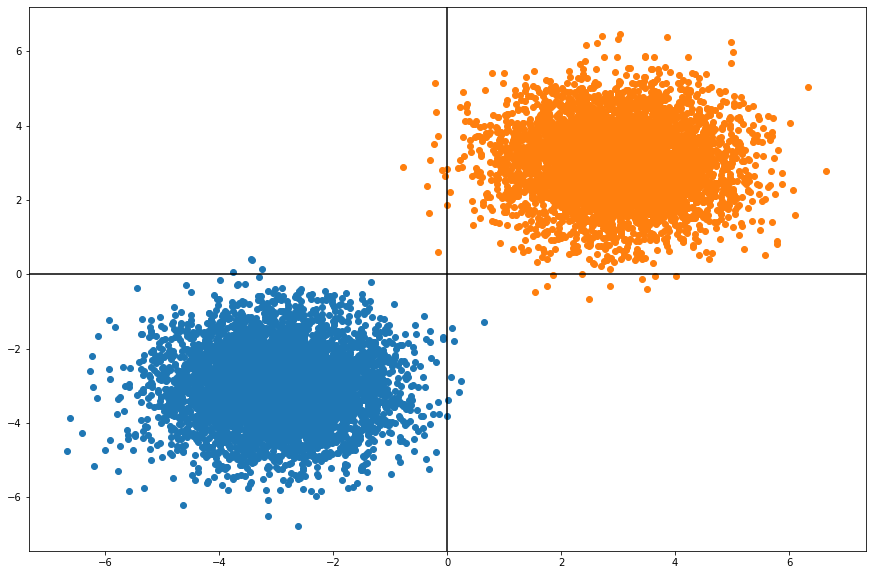

In [0]:
plot_distribution(10000)

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#So far the only shape that works is Gaussian Clusters

#b is the number of labels in the set, each with N observations
def two_classes(N,distributionShape,b,noise):

  if(b == 2 and distributionShape =='GaussianClusters'):
    sample1N= int(N/b)
    sample2N = int(N/b)
      ##First Cluster
    cov = [[1, 0], [0, 1]] #covariance
    mean = [-3, -3] #mean
    x1=np.random.multivariate_normal(mean, cov, sample1N)
    x1 = np.c_[x1,np.ones(sample1N)] ##add bias column
    
    if(noise=="yes"):
      x1 = np.c_[x1,choices([0,1],[0.5,0.5],k=sample1N)]
    else:
      x1 = np.c_[x1,np.zeros(sample1N)] ##add bias column without noise 
       
    cov = [[1, 0], [0, 1]]
    mean = [3, 3]
    x2=np.random.multivariate_normal(mean, cov, sample2N)
    x2 = np.c_[x2,np.ones(sample2N)] ##add bias column
    if(noise=="yes"):
      x2 = np.c_[x2,choices([0,1],[0.5,0.5],k=sample1N)]
    else:
      x2 = np.c_[x2,np.ones(sample1N)] ##add bias column without noise 

    X = np.concatenate([x1,x2],axis=0)
    return X


  if(b > 2 and distributionShape == 'GaussianClusters'):
    samplesizes = {}
    for i in range(1,b+1):
      samplesizes["sample{0}".format(i)] = int(N/b)
    
    storagedict = {}
    datalist = []
    for i in range(1,b+1):
      cov = [[1,0],[0,1]]
      mean = [i,i]
      storagedict["x{0}".format(i)] = np.random.multivariate_normal(mean,cov,samplesizes["sample{0}".format(i)])
      storagedict["x{0}".format(i)] = np.c_[storagedict["x{0}".format(i)],np.ones(samplesizes["sample{0}".format(i)])] # adds bias
      ##Adding Label Noise with a uniform probability 
      if(noise=="yes"):
        storagedict["x{0}".format(i)] = np.c_[storagedict["x{0}".format(i)],choices(np.arange(0,b),k=samplesizes["sample{0}".format(i)])] ##add label column (0)
      else:
        storagedict["x{0}".format(i)] = np.c_[storagedict["x{0}".format(i)],i*np.ones(samplesizes["sample{0}".format(i)])-1] ##add label column (0)
      #datamatrix = np.append(datamatrix,np.array([storagedict['x{0}'.format(i)]]),axis=0) #convert to numpy array
      datalist.append(storagedict["x{0}".format(i)])
    X = np.concatenate(datalist,axis=0)
    return X


In [130]:
testdist = two_classes(N=100,distributionShape='GaussianClusters',b=3,noise='yes')

testdist[:,3]

array([0., 1., 2., 2., 0., 0., 2., 2., 2., 1., 2., 1., 0., 1., 2., 2., 2.,
       2., 2., 1., 2., 0., 2., 2., 1., 1., 1., 1., 2., 1., 0., 1., 0., 2.,
       2., 1., 0., 0., 0., 1., 2., 0., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
       0., 1., 1., 1., 1., 1., 2., 1., 0., 2., 2., 2., 1., 1., 1., 2., 2.,
       0., 0., 2., 1., 2., 1., 0., 0., 2., 0., 1., 1., 1., 1., 0., 2., 1.,
       0., 1., 2., 0., 2., 2., 0., 2., 0., 2., 1., 0., 0., 1.])

In [114]:
np.arange(0,4)

array([0, 1, 2, 3])

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def two_classes(N,distributionShape):
  sample1N= int(N/2)
  sample2N = int(N/2)
  if(distributionShape =='two_clusters'):
    ##First Cluster
    cov = [[1, 0], [0, 1]] #covariance
    mean = [-3, -3] #mean
    x1=np.random.multivariate_normal(mean, cov, sample1N)
    x1 = np.c_[x1,np.ones(sample1N)] ##add bias column
    x1 = np.c_[x1,np.zeros(sample1N)] ##add label column (0)
    
    cov = [[1, 0], [0, 1]]
    mean = [3, 3]
    x2=np.random.multivariate_normal(mean, cov, sample2N)
    #x2[:,:-1]=2 # add labels to the second dataset
    x2 = np.c_[x2,np.ones(sample2N)] ##add bias column
    x2 = np.c_[x2,np.ones(sample2N)] ##add label column (1)

    X = np.concatenate([x1,x2],axis=0)

    return X

# Updated to Generalize to 'b' Gaussian Clusters all with N samples: Feb 22 

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#So far the only shape that works is Gaussian Clusters

#b is the number of labels in the set, each with N observations
def two_classes(N,distributionShape,b,noise):

  if(b == 2 and distributionShape =='GaussianClusters'):
    sample1N= int(N/b)
    sample2N = int(N/b)
      ##First Cluster
    cov = [[1, 0], [0, 1]] #covariance
    mean = [-3, -3] #mean
    x1=np.random.multivariate_normal(mean, cov, sample1N)
    x1 = np.c_[x1,np.ones(sample1N)] ##add bias column
    
    if(noise=="yes"):
      x1 = np.c_[x1,choices([0,1],[0.5,0.5],k=sample1N)]
    else:
      x1 = np.c_[x1,np.zeros(sample1N)] ##add bias column without noise 
       
    cov = [[1, 0], [0, 1]]
    mean = [3, 3]
    x2=np.random.multivariate_normal(mean, cov, sample2N)
    x2 = np.c_[x2,np.ones(sample2N)] ##add bias column
    if(noise=="yes"):
      x2 = np.c_[x2,choices([0,1],[0.5,0.5],k=sample1N)]
    else:
      x2 = np.c_[x2,np.ones(sample1N)] ##add bias column without noise 

    X = np.concatenate([x1,x2],axis=0)
    return X


  if(b > 2 and distributionShape == 'GaussianClusters'):
    samplesizes = {}
    for i in range(1,b+1):
      samplesizes["sample{0}".format(i)] = int(N/b)
    
    storagedict = {}
    datalist = []
    for i in range(1,b+1):
      cov = [[1,0],[0,1]]
      mean = [i,i]
      storagedict["x{0}".format(i)] = np.random.multivariate_normal(mean,cov,samplesizes["sample{0}".format(i)])
      storagedict["x{0}".format(i)] = np.c_[storagedict["x{0}".format(i)],np.ones(samplesizes["sample{0}".format(i)])] # adds bias
      storagedict["x{0}".format(i)] = np.c_[storagedict["x{0}".format(i)],i*np.ones(samplesizes["sample{0}".format(i)])-1] ##add label column (0)
      #datamatrix = np.append(datamatrix,np.array([storagedict['x{0}'.format(i)]]),axis=0) #convert to numpy array
      datalist.append(storagedict["x{0}".format(i)])
    X = np.concatenate(datalist,axis=0)
    return X


In [56]:
two_classes(N=100,distributionShape="GaussianClusters",b=2,noise='no')

array([[-3.88769046, -2.95808572,  1.        ,  0.        ],
       [-4.72583223, -2.7873165 ,  1.        ,  0.        ],
       [-2.83477106, -2.81510475,  1.        ,  0.        ],
       [-3.50524106, -2.64954931,  1.        ,  0.        ],
       [-2.92189707, -3.08497408,  1.        ,  0.        ],
       [-4.02407645, -3.55093119,  1.        ,  0.        ],
       [-2.07795704, -3.92704599,  1.        ,  0.        ],
       [-2.76025994, -3.54631323,  1.        ,  0.        ],
       [-2.32361441, -3.99340631,  1.        ,  0.        ],
       [-2.89552811, -2.70228646,  1.        ,  0.        ],
       [-2.06401414, -1.61698288,  1.        ,  0.        ],
       [-2.99967142, -3.7429593 ,  1.        ,  0.        ],
       [-3.64450155, -3.21783072,  1.        ,  0.        ],
       [-4.58899136, -3.28111879,  1.        ,  0.        ],
       [-2.98890622, -4.48252521,  1.        ,  0.        ],
       [-2.7580789 , -4.11533451,  1.        ,  0.        ],
       [-4.46922136, -1.

# Generate our data:

In [0]:
X = two_classes(N=100,distributionShape = 'GaussianClusters',b=2,noise='a')
print(X.shape)
#print(X)

(100, 4)


## The Neural Network:

train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
// X is the data matrix, one example per row
// numInput is the number of columns of input in X
// numOutput is the number of columns of output in X
// activationType is either ’linear’ or ’sigmoid’ or ’reLU’;
// it specifies only the activation function of the single hidden layer
// numIter is the number of iterations for which your training algorithm should run.
//
// Return:
// The function should return (W1, W2), a 2-tuple of weight matrices for the
// input-to-hidden and hidden-to-output layers, similarly to the sample code
// done in lab.

# Train function (1)

In [0]:
#X = two_classes(1000,'two_clusters') #generate data with N samples for each cluster
def sigmoid(x,deriv=False):
  if(deriv==True):
    return x*(1-x)
  return 1/(1+np.exp(-x))

def linear(x,deriv=False):
  if(deriv==True):
    return 1
  return x

def reLU(x,deriv=False):
  return np.maximum(0,X)

def softmax(x,deriv=False):
  numerator = np.exp(x)
  denominator = np.sum(np.exp(x))
  return numerator/denominator



def train(X, numInput, numHiddenUnits,numOutput,activationType,numIter):

  if(activationType=='sigmoid'):
    activator=sigmoid
  elif(activationType=='linear'):
    activator=linear
  elif(activationType=='relu'):
    activator=reLU 

  Xin = X[:,0:numInput]
  Xlabel = X[:,numInput]

  t = Xlabel.T
  t = t.reshape(Xin.shape[0],1)

  #Weight Matrices
  W1 = 2*np.random.random((numInput,numHiddenUnits)) - 1 #mean -1 and variance 2
  W2 = 2*np.random.random((numHiddenUnits,numOutput)) - 1

  for j in range(numIter):
    #h = 1/(1+np.exp(-(np.dot(Xin,W1)))) #input to hidden layer
    h = activator(np.dot(Xin,W1),False)

    #y = 1/(1+np.exp(-(np.dot(h,W2)))) #hidden layer to output node
    y=activator(np.dot(h,W2),False)
    
    
    y_delta = (t - y)*(y*(1-y)) #calculate error in output using back prop and chain rule
    h_delta = np.dot(y_delta, W2.T) * (h * (1-h)) #calculate error in hidden layer output 
    
    W2 += np.dot(h.T, y_delta) #update weights
    W1 += np.dot(Xin.T, h_delta)

  return (W1, W2)
  

# Train function (2)

In [0]:
#X = two_classes(1000,'two_clusters') #generate data with N samples for each cluster
def sigmoid(x,deriv=False):
  if(deriv==True):
    return x*(1-x)
  return 1/(1+np.exp(-x))

def linear(x,deriv=False):
  if(deriv==True):
    return 1
  return x

def reLU(x,deriv=False):
  if(deriv==True):
    x[x>0] = 1
    x[x<=0] = 0
    return x

  return np.maximum(0,x)

def softmax(x,deriv=False):
  numerator = np.exp(x)
  denominator = numerator.sum(axis=1,keepdims=True)
  return numerator/denominator


##Training Function##
def train(X, numInput, numHiddenUnits,numOutput,activationType,numIter):
  
  if(activationType=='sigmoid'):
    activator1=sigmoid
    activator2=sigmoid
  elif(activationType=='linear'):
    activator1=linear
    activator2=sigmoid
  elif(activationType=='relu'):
    activator1=reLU
    activator2=sigmoid 
  if(numOutput > 1):
    activator2 = softmax

  #Partition dataset into inputs and targets
  Xin = X[:,0:numInput]
  Xlabel = X[:,numInput]

  t = Xlabel.T
  t = t.reshape(Xin.shape[0],1) ###GOOD for data with only one target variable

  #Hidden Layer Weight Matrices
  W1 = 2*np.random.random((numInput,numHiddenUnits)) - 1 #mean -1 and variance 2
  #Output Layer Weight Matrices
  W2 = 2*np.random.random((numHiddenUnits,numOutput)) - 1

  #Determine how many iterations to perform
  for j in range(numIter):
    
    ###Activation Functions###Forward Propagation###
    ##Input layer to hidden layer##
    h = activator1(np.dot(Xin,W1),False)

    ##Hidden Layer to Output Layer (Default is Sigmoid)
    y = activator2(np.dot(h,W2),False)

    ##Backpropagation Step##

    ######Output Layer: Y #########################Sigmoid or Softmax if Output > 1#######################
    ##Sigmoid chain rule
    if(activator2==sigmoid):
      #y_delta = (t - y)*sigmoid(y,deriv=True) #calculate error in output using back prop and chain rule ##why doesnt this work?
      y_delta = (t - y)*(y*(1-y))
      
    ##Softmax chain rule
    elif(activator2==softmax):
      y_delta= 1

    ######Hidden Layer: H ##################Sigmoid, Linear, reLU###############################################
    ########################################################################################################

    ##Sigmoid chain rule
    if(activator1==sigmoid):
      h_delta = np.dot(y_delta, W2.T) * sigmoid(h,deriv=True) #calculate error in hidden layer output
      #h_delta = np.dot(y_delta, W2.T) * (h * (1-h))
    
    #Linear Function Chain Rule
    elif(activator1==linear):
      h_delta = np.dot(y_delta, W2.T) * linear(h,deriv=True) #calculate error in hidden layer output

    #Relu Function Chain Rule
    elif(activator1==reLU):
      h_delta = np.dot(y_delta, W2.T) * reLU(h,deriv=True) #calculate error in hidden layer output

      ####################################################################################################################    
    W2 += np.dot(h.T, y_delta) #update weights
    W1 += np.dot(Xin.T, h_delta)

  return (W1, W2)
  

Train Function (3) With Added Outputs (Softmax)


In [0]:
#X = two_classes(1000,'two_clusters') #generate data with N samples for each cluster
def sigmoid(x,deriv=False):
  if(deriv==True):
    return x*(1-x)

  s = np.where(x >=0, (1 / (1+ np.exp(-x))) , (np.exp(x)/ (1+np.exp(x))))
  return s

def linear(x,deriv=False):
  if(deriv==True):
    return 1
  return x

def reLU(x,deriv=False):
  if(deriv==True):
    x[x>0] = 1
    x[x<=0] = 0
    return x

  return np.maximum(0,x)

def softmax(x,deriv=False):
  numerator = np.exp(x)
  denominator = numerator.sum(axis=1,keepdims=True)
  return numerator/denominator

def softmax(x,deriv=False):
  b = x.max()
  y = np.exp(x - b)
  return y / y.sum()


def train(X, numInput, numHiddenUnits,numOutput,activationType,numIter):
  
  if(activationType=='sigmoid'):
    activator1=sigmoid
    activator2=sigmoid
  elif(activationType=='linear'):
    activator1=linear
    activator2=sigmoid
  elif(activationType=='relu'):
    activator1=reLU
    activator2=sigmoid 
  if(numOutput > 1):
    activator2 = softmax

  #Partition dataset into inputs and targets
  Xin = X[:,0:numInput]
  Xlabel = X[:,numInput]

  t = Xlabel.T
  t = t.reshape(Xin.shape[0],1) ###GOOD for data with only one target variable

  #Hidden Layer Weight Matrices
  W1 = 2*np.random.random((numInput,numHiddenUnits)) - 1 #mean -1 and variance 2
  #Output Layer Weight Matrices
  W2 = 2*np.random.random((numHiddenUnits,numOutput)) - 1

  #Determine how many iterations to perform
  for j in range(numIter):
    
    ###Activation Functions###Forward Propagation###
    ##Input layer to hidden layer##
    h = activator1(np.dot(Xin,W1),False)

    y = activator2(np.dot(h,W2),False)

    ##Backpropagation Step##

    ######Output Layer: Y #########################Sigmoid or Softmax if Output > 1#######################
    ##Sigmoid chain rule using average least squares 
    if(activator2==sigmoid):
      #y_delta = (t - y)*sigmoid(y,deriv=True) #calculate error in output using back prop and chain rule ##why doesnt this work?
      y_delta = (t - y)*(y*(1-y)) 
      
    ##Softmax chain rule
    elif(activator2==softmax):
      y_delta= 1

    ######Hidden Layer: H ##################Sigmoid, Linear, reLU###############################################
    ########################################################################################################

    ##Sigmoid chain rule
    if(activator1==sigmoid):
      h_delta = np.dot(y_delta, W2.T) * sigmoid(h,deriv=True) #calculate error in hidden layer output
      #h_delta = np.dot(y_delta, W2.T) * (h * (1-h))
    
    #Linear Function Chain Rule
    elif(activator1==linear):
      h_delta = np.dot(y_delta, W2.T) * linear(h,deriv=True) #calculate error in hidden layer output

    #Relu Function Chain Rule
    elif(activator1==reLU):
      h_delta = np.dot(y_delta, W2.T) * reLU(h,deriv=True) #calculate error in hidden layer output

      ####################################################################################################################    
    W2 += np.dot(h.T, y_delta) #update weights
    W1 += np.dot(Xin.T, h_delta)

  return (W1, W2)
  

In [0]:
def softmax(x,deriv=False):
  b = x.max()
  y = np.exp(x - b)
  return y / y.sum()
  
  #denominator = numerator.sum(axis=1,keepdims=True)


'''
def sigmoid(x,deriv=False):
  if(deriv==True):
    return x*(1-x)
  if x>= 0 :
    z = np.exp(-x)
    return 1 / (1+z)
  else:
    #if x is less than zero, then z will be small, denom can't be zero
    z = np.exp(x)
    return z / (1 + z)

'''
def sigmoid(x,deriv=False):
  if(deriv==True):
    return x*(1-x)

  s = np.where(x >=0, (1 / (1+ np.exp(-x))) , (np.exp(x)/ (1+np.exp(x))))
  return s
  

numInput=3
numHiddenUnits=4
numOutput=3

X = two_classes(N=100,distributionShape = 'GaussianClusters',b=numOutput,noise='a')

Xin = X[:,0:numInput]
Xlabel = X[:,numInput]

t = Xlabel.T
t = t.reshape(Xin.shape[0],1) ###GOOD for data with only one target variable


#Hidden Layer Weight Matrices
W1 = 2*np.random.random((numInput,numHiddenUnits)) - 1 #mean -1 and variance 2
  #Output Layer Weight Matrices
W2 = 2*np.random.random((numHiddenUnits,numOutput)) - 1

h = sigmoid(np.dot(Xin,W1),False)

y = softmax(np.dot(h,W2),False)

####want to begin back propagation

y_delta = (t - y)*(y*(1-y)) # need the gradient for the softmax

h_delta = np.dot(y_delta, W2.T) * sigmoid(h,deriv=True) 

In [0]:
y

array([[0.6782618 , 0.22771956, 0.09401864],
       [0.7554873 , 0.19192919, 0.05258351],
       [0.69881119, 0.23731222, 0.0638766 ],
       [0.69424845, 0.20894423, 0.09680732],
       [0.73275908, 0.19697899, 0.07026193],
       [0.7214942 , 0.22535444, 0.05315135],
       [0.79010122, 0.17533781, 0.03456098],
       [0.74120062, 0.21338621, 0.04541318],
       [0.74762448, 0.1847649 , 0.06761062],
       [0.78604442, 0.18602074, 0.02793484],
       [0.73676583, 0.19822538, 0.06500879],
       [0.74987354, 0.21047198, 0.03965449],
       [0.70033169, 0.2172832 , 0.08238511],
       [0.70211867, 0.21357573, 0.0843056 ],
       [0.71027743, 0.2157637 , 0.07395887],
       [0.70933363, 0.22589726, 0.0647691 ],
       [0.69270704, 0.19555294, 0.11174002],
       [0.73736625, 0.19568165, 0.0669521 ],
       [0.64377049, 0.17725866, 0.17897085],
       [0.72375058, 0.1533999 , 0.12284952],
       [0.79171691, 0.18133119, 0.0269519 ],
       [0.74893493, 0.16026981, 0.09079526],
       [0.

#Predict Function (1)

In [0]:
#def predict(x,W1,W2,numInput, numHiddenUnits, numOutput, activationType, verbosity):
def predict(x,W1,W2):
  '''Produce a prediction for x, using the weights defined above.'''
  ### INPUT -> HIDDEN LAYER
  # Multiply x by the first set of weights
  z1 = np.dot(x,W1)
  # Activation function
  h = 1 / (1+np.exp(-(z1)))

  ### HIDDEN LAYER -> OUTPUT
  # Multiply the hidden layer outputs by the next set of weights
  z2 = np.dot(h,W2)
  # Activation function
  y = 1 / (1+np.exp(-(z2)))
  return y

Predict Function (2):

In [0]:
#def predict(x,W1,W2,numInput, numHiddenUnits, numOutput, activationType, verbosity):
def predict(x,W1,W2,numInput,numHiddenUnits,numOutput,activationType,verbosity):
  '''Produce a prediction for x, using the weights defined above.'''
   
  if(activationType=='sigmoid'):
    activator1=sigmoid
    activator2=sigmoid
  elif(activationType=='linear'):
    activator1=linear
    activator2=sigmoid
  elif(activationType=='relu'):
    activator1=reLU
    activator2=sigmoid 
  if(numOutput > 1):
    activator2 = softmax
  
  ### INPUT -> HIDDEN LAYER
  # Multiply x by the first set of weights
  z1 = np.dot(x,W1)
  # Activation function
  h = activator1(z1,False)

  ### HIDDEN LAYER -> OUTPUT
  # Multiply the hidden layer outputs by the next set of weights
  z2 = np.dot(h,W2)
  # Activation function
  y = activator2(z2,False)

  return y

Prediction Step:

In [0]:
#print(predict([-2,-2,1],W1,W2))
#print(predict([2,2,1],W1,W2))
print(predict([2,2,1],W1,W2,numInput=1,numHiddenUnits=1,numOutput=1,activationType='sigmoid',verbosity='a'))
print(predict([-2,-2,1],W1,W2,numInput=1,numHiddenUnits=1,numOutput=1,activationType='sigmoid',verbosity='a'))

[1.10329821e-09]
[1.]


All Together:

In [0]:
#Generate Data
X = two_classes(N=100,distributionShape = 'GaussianClusters',b=2,noise='a')
print(X.shape)
#print(X)

(100, 4)


Train and create weights:

In [0]:
W1,W2 = train(X,3,4,1,'sigmoid',60000)

Predict:

In [0]:
print(predict([2,2,1],W1,W2,numInput=1,numHiddenUnits=1,numOutput=1,activationType='sigmoid',verbosity='a'))
print(predict([-2,-2,1],W1,W2,numInput=1,numHiddenUnits=1,numOutput=1,activationType='sigmoid',verbosity='a'))

[0.99999925]
[0.00042448]


In [0]:
def CrossEntropy(yHat, y):
    if y == 1:
      return -np.log(yHat)
    else:
      return -np.log(1 - yHat)